### 로이터 데이터셋

In [1]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = \
                    reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [2]:
print('훈련 데이터 개수 : ', len(train_data))
print('테스트 데이터 개수 : ', len(test_data))

훈련 데이터 개수 :  8982
테스트 데이터 개수 :  2246


In [3]:
print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


In [4]:
print(train_labels[0])

3


In [5]:
word_index = reuters.get_word_index()
print(word_index)

565248/550378 [==============================] - 0s 0us/step
{'mdbl': 10996, 'fawc': 16260, 'degussa': 12089, 'woods': 8803, 'hanging': 13796, 'localized': 20672, 'sation': 20673, 'chanthaburi': 20675, 'refunding': 10997, 'hermann': 8804, 'passsengers': 20676, 'stipulate': 20677, 'heublein': 8352, 'screaming': 20713, 'tcby': 16261, 'four': 185, 'grains': 1642, 'broiler': 20680, 'wooden': 12090, 'wednesday': 1220, 'highveld': 13797, 'duffour': 7593, '0053': 20681, 'elections': 3914, '270': 2563, '271': 3551, '272': 5113, '273': 3552, '274': 3400, 'rudman': 7975, '276': 3401, '277': 3478, '278': 3632, '279': 4309, 'dormancy': 9381, 'errors': 7247, 'deferred': 3086, 'sptnd': 20683, 'cooking': 8805, 'stratabit': 20684, 'designing': 16262, 'metalurgicos': 20685, 'databank': 13798, '300er': 20686, 'shocks': 20687, 'nawg': 7972, 'tnta': 20688, 'perforations': 20689, 'affiliates': 2891, '27p': 20690, 'ching': 16263, 'china': 595, 'wagyu': 16264, 'affiliated': 3189, 'chino': 16265, 'chinh': 162

In [6]:
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
print(sorted(reverse_word_index.items()))

[(1, 'the'), (2, 'of'), (3, 'to'), (4, 'in'), (5, 'said'), (6, 'and'), (7, 'a'), (8, 'mln'), (9, '3'), (10, 'for'), (11, 'vs'), (12, 'dlrs'), (13, 'it'), (14, 'reuter'), (15, '000'), (16, '1'), (17, 'pct'), (18, 'on'), (19, 'from'), (20, 'is'), (21, 'that'), (22, 'its'), (23, 'cts'), (24, 'by'), (25, 'at'), (26, 'year'), (27, 'be'), (28, 'with'), (29, '2'), (30, 'will'), (31, 'was'), (32, 'billion'), (33, 'he'), (34, 'u'), (35, 's'), (36, 'net'), (37, 'has'), (38, 'would'), (39, 'an'), (40, 'as'), (41, '5'), (42, 'not'), (43, 'loss'), (44, '4'), (45, '1986'), (46, 'company'), (47, 'which'), (48, 'but'), (49, 'this'), (50, 'shr'), (51, 'last'), (52, 'are'), (53, 'lt'), (54, 'have'), (55, 'or'), (56, '6'), (57, 'bank'), (58, '7'), (59, 'were'), (60, '8'), (61, 'had'), (62, 'oil'), (63, 'trade'), (64, 'share'), (65, 'one'), (66, 'about'), (67, '0'), (68, 'inc'), (69, '9'), (70, 'new'), (71, 'profit'), (72, 'also'), (73, 'market'), (74, 'they'), (75, 'two'), (76, 'shares'), (77, 'stock'), 

In [7]:
decoded_newswire = ' '.join(
    [reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

### 데이터 준비

In [8]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension)) 
    for i, sequence in enumerate(sequences): 
        results[i, sequence] = 1. 
    return results

# 훈련 데이터 변환
x_train = vectorize_sequences(train_data)

# 테스트 데이터 변환
x_test = vectorize_sequences(test_data)

In [9]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [10]:
print(x_train[0])

[0. 1. 1. ... 0. 0. 0.]


In [11]:
print(one_hot_train_labels[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### 모델 구성

In [12]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation='relu', 
                input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

In [13]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### 훈련 검증

In [14]:
x_eval = x_train[:1000]
y_eval = one_hot_train_labels[:1000]
x_train = x_train[1000:]
y_train = one_hot_train_labels[1000:]

In [15]:
history = model.fit(x_train, 
                    y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_eval, y_eval))

Epoch 1/20
16/16 [==============================] - 2s 60ms/step - loss: 3.3038 - accuracy: 0.4414 - val_loss: 2.5368 - val_accuracy: 0.5500
Epoch 2/20
16/16 [==============================] - 1s 46ms/step - loss: 1.9847 - accuracy: 0.6308 - val_loss: 1.6025 - val_accuracy: 0.6600
Epoch 3/20
16/16 [==============================] - 1s 46ms/step - loss: 1.3307 - accuracy: 0.7241 - val_loss: 1.2798 - val_accuracy: 0.7230
Epoch 4/20
16/16 [==============================] - 1s 48ms/step - loss: 1.0131 - accuracy: 0.7910 - val_loss: 1.1326 - val_accuracy: 0.7600
Epoch 5/20
16/16 [==============================] - 1s 46ms/step - loss: 0.8024 - accuracy: 0.8339 - val_loss: 1.0494 - val_accuracy: 0.7880
Epoch 6/20
16/16 [==============================] - 1s 46ms/step - loss: 0.6347 - accuracy: 0.8695 - val_loss: 0.9851 - val_accuracy: 0.8070
Epoch 7/20
16/16 [==============================] - 1s 46ms/step - loss: 0.5014 - accuracy: 0.8985 - val_loss: 0.9476 - val_accuracy: 0.8090
Epoch 8/20
16

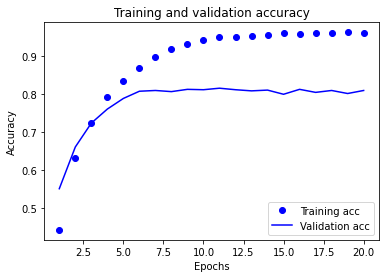

In [16]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [17]:
model = Sequential()
model.add(Dense(64, activation='relu', 
                input_shape=(10000,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=7, batch_size=512);

res = model.evaluate(x_test, one_hot_test_labels)
res

Epoch 1/7
16/16 [==============================] - 1s 41ms/step - loss: 3.2087 - accuracy: 0.4389
Epoch 2/7
16/16 [==============================] - 1s 41ms/step - loss: 1.8953 - accuracy: 0.6209
Epoch 3/7
16/16 [==============================] - 1s 41ms/step - loss: 1.3134 - accuracy: 0.7101
Epoch 4/7
16/16 [==============================] - 1s 42ms/step - loss: 1.0196 - accuracy: 0.7648
Epoch 5/7
16/16 [==============================] - 1s 41ms/step - loss: 0.8147 - accuracy: 0.8232
Epoch 6/7
16/16 [==============================] - 1s 41ms/step - loss: 0.6428 - accuracy: 0.8618
Epoch 7/7
71/71 [==============================] - 0s 3ms/step - loss: 0.9945 - accuracy: 0.7823


[0.9944713711738586, 0.7822796106338501]

In [18]:
predictions = model.predict(x_test)

In [22]:
np.sum(predictions[0])

0.99999994

In [20]:
np.argmax(predictions[0])

3